In [14]:
import nltk
from nltk.parse import RecursiveDescentParser

In [5]:
grammar1 = nltk.CFG.fromstring(""" 
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> 'saw' | 'ate' | 'walked'
NP -> 'John' | 'Mary' | 'Bob' | Det N | Det N PP
Det -> 'a' | 'an' | 'the' | 'my'
N -> 'man' | 'dog' | 'cat' | 'telescope' | 'park'
P -> 'in' | 'on' | 'by' | 'with'
""") 

grammar2 = nltk.CFG.fromstring(""" 
S -> NP VP
NP -> Det Nom | PropN
Nom -> Adj Nom | N
VP -> V Adj | V NP | V S | V NP PP
PP -> P NP
PropN -> 'Buster' | 'Chatterer' | 'Joe'
Det -> 'the' | 'a'
N -> 'bear' | 'squirrel' | 'tree' | 'fish'
Adj -> 'angry' | 'frightened' | 'little' | 'tall'
V -> 'chased' | 'said' | 'thought' | 'was' | 'put'
P -> 'on'
""") 

## Grammar 1

In [111]:
rd1 = RecursiveDescentParser(grammar1)
sentence1 = 'John ate the dog in my park'
sentence2 = 'Bob saw a dog with a telescope'

In [112]:
tree_string1 = ''
tree_string2 = ''
for t in rd1.parse(sentence1.split()):
    tree_string1 = t.pformat()
for t in rd1.parse(sentence2.split()):
    tree_string2 = t.pformat()
print(tree_string1)
print(tree_string2)

(S
  (NP John)
  (VP
    (V ate)
    (NP (Det the) (N dog))
    (PP (P in) (NP (Det my) (N park)))))
(S
  (NP Bob)
  (VP
    (V saw)
    (NP (Det a) (N dog))
    (PP (P with) (NP (Det a) (N telescope)))))


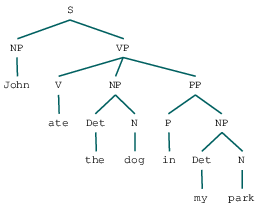

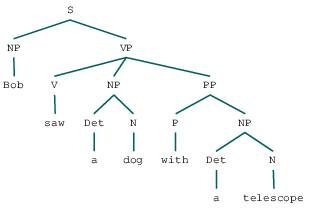

In [113]:
from nltk import Tree
from nltk.draw.tree import TreeView
from IPython.display import display

tree1 = Tree.fromstring(tree_string1)
tree2 = Tree.fromstring(tree_string2)
display(tree1)
display(tree2)

## Grammar 2

In [119]:
rd2 = RecursiveDescentParser(grammar2)
sentence1 = 'Joe chased a angry bear'
sentence2 = 'Joe was a tall squirrel '

In [120]:
tree_string1 = ''
tree_string2 = ''
for t in rd2.parse(sentence1.split()):
    tree_string1 = t.pformat()
for t in rd2.parse(sentence2.split()):
    tree_string2 = t.pformat()
    print(t)
print(tree_string1)
print(tree_string2)

(S
  (NP (PropN Joe))
  (VP (V was) (NP (Det a) (Nom (Adj tall) (Nom (N squirrel))))))
(S
  (NP (PropN Joe))
  (VP (V chased) (NP (Det a) (Nom (Adj angry) (Nom (N bear))))))
(S
  (NP (PropN Joe))
  (VP (V was) (NP (Det a) (Nom (Adj tall) (Nom (N squirrel))))))


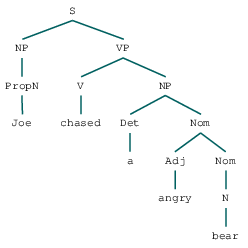

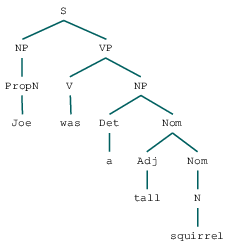

In [121]:
from nltk import Tree
from nltk.draw.tree import TreeView
from IPython.display import display

tree1 = Tree.fromstring(tree_string1)
tree2 = Tree.fromstring(tree_string2)
display(tree1)
display(tree2)